In [14]:
import os
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns; sns.set_style("white")
import umap.plot
%matplotlib inline
os.getcwd()

'/Users/chririn/Documents/Code/2D_analysis_v2'

In [15]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [16]:
BaseDir = "./results/"


In [17]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data_notMAD.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)


,Metadata_layout_id,Metadata_well_id,Metadata_cmpd,Metadata_batch_id,Metadata_solvent,Metadata_stock_conc,Metadata_stock_conc_unit,Metadata_cmpd_vol,Metadata_cmpd_vol_unit,Metadata_well_vol,...,RadialDistribution_ZernikePhase_illumSYTO_9_5_cytoplasm,Location_MaxIntensity_Z_illumPHAandWGA_nuclei,RadialDistribution_ZernikePhase_illumMITO_8_0_nuclei,RadialDistribution_ZernikePhase_illumPHAandWGA_6_6_cells,Correlation_Costes_illumCONC_illumMITO_cytoplasm,Correlation_K_illumCONC_illumMITO_nuclei,RadialDistribution_ZernikePhase_illumPHAandWGA_6_6_cytoplasm,AreaShape_Zernike_6_6_cells,RadialDistribution_ZernikePhase_illumMITO_1_1_cells,Correlation_Costes_illumCONC_illumPHAandWGA_nuclei
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,[tetr],PHB000015,dmso,10.0,mM,7.5,nL,30,...,0.392774,0.0,1.991515,1.031468,0.777336,0.295102,0.678666,-1.301256,2.650399,0.0


In [18]:
df_toplot = selected_df
df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001
df_toplot['Metadata_inv_log_conc'] = 10 - pDose(df_toplot['Metadata_cmpd_conc'])
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()

/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_91567/1047800069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 0.0001


Text(0.5, 1.0, 'Moa')

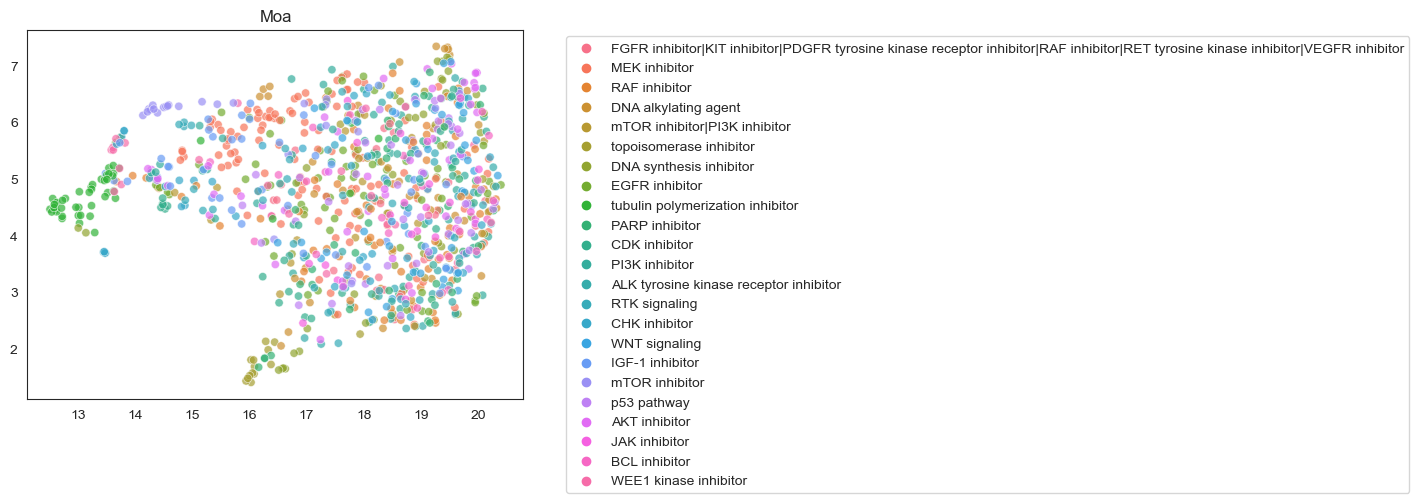

In [19]:
## UMAP - MOA

reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist= 0.1, random_state=42)
embedding = reducer.fit_transform(training_data)

fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_moa,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )
plt.legend(bbox_to_anchor=(2.8, 1),loc='upper right')
plt.title('Moa')

Text(0.5, 1.0, 'Class')

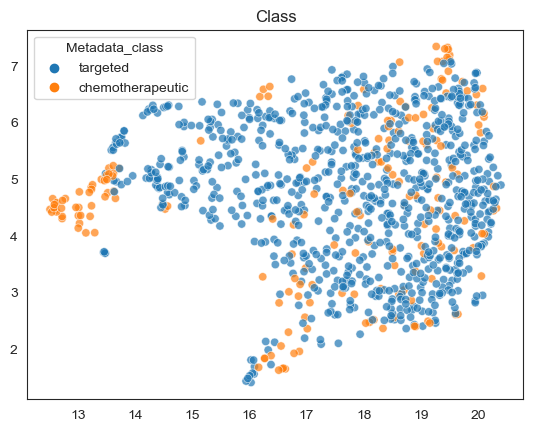

In [21]:
## UMAP - Class
fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_class,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )

plt.title('Class')

Text(0.5, 1.0, 'Compound')

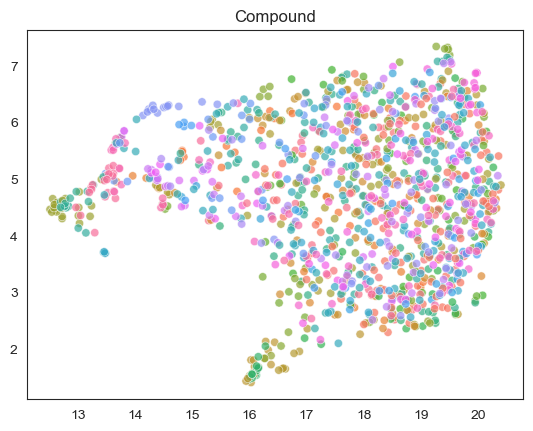

In [22]:
## UMAP - Compound
fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_cmpd,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )
plt.title('Compound')

In [66]:
# np.set_printoptions(suppress=True)
# labels = df_toplot["Metadata_cmpd_conc"].unique()
# labels = np.sort(labels)
# labels = np.delete(labels, 6)
# labels

Text(0.5, 1.0, 'Compound conc')

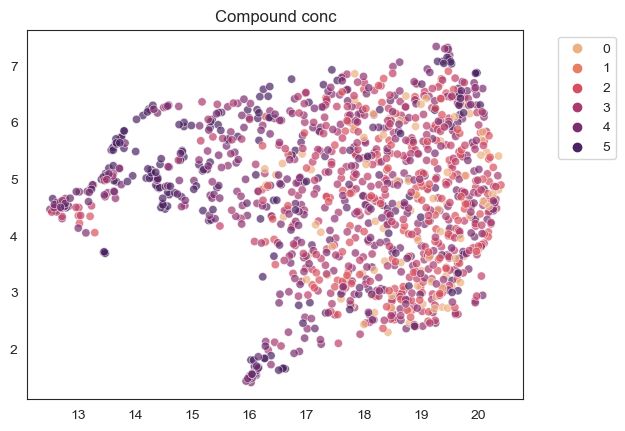

In [65]:
## UMAP - conc
fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_inv_log_conc,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    palette='flare',
    #legend=False
    )
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right')
plt.title('Compound conc')

Text(0.5, 1.0, 'Plate')

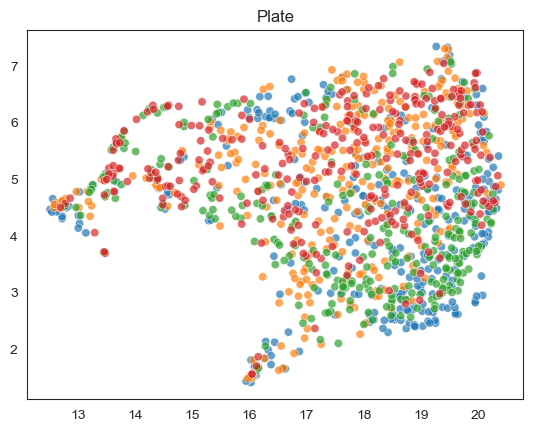

In [62]:
## UMAP - Plate
fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_layout_id,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    legend=False
    )

plt.title('Plate')

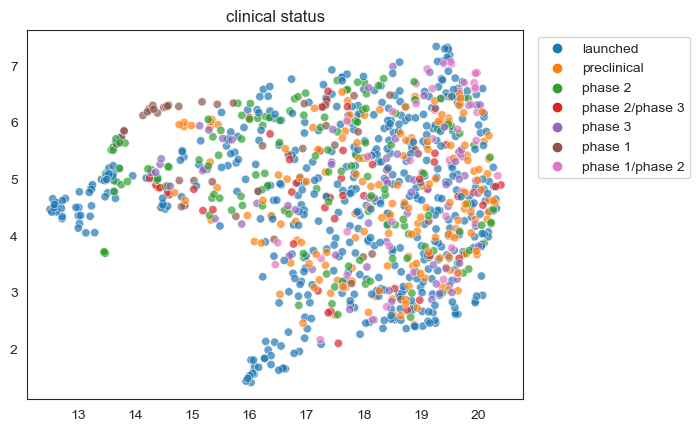

In [63]:
## UMAP - Compound
fig = plt.figure()
ax = sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df_toplot.Metadata_clinical_status,
    alpha=(0.7),
    marker="o",
    #size=df_toplot["Metadata_cmpd_conc"],
    #palette=pal,
    #legend=False
    )

plt.title('clinical status')
plt.legend(bbox_to_anchor=(1.35, 1),loc='upper right')